In [74]:
import pickle
from itertools import combinations

import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20

# IMDb

IMDb is the most popular movie website and it combines movie plot description, metastore ratings, critic and user ratings and reviews, release dates, and many more aspects. 

IMDb uses unique identifiers for each of the entities referenced in IMDb data. For example we have "Name IDs" (imdb_name_id) identifying name entities (people) and "Title IDs" (imdb_title_id) identifying title entities (movies, series, episodes and video games). IMDb's identifiers always take the form of two letters, which signify the type of entity being identified, followed by a sequence of at least seven numbers that uniquely identify a specific entity of that type. 

## People

In [93]:
# Load the table containing personal information of the people on IMDb.
names = pd.read_csv("./download/IMDb_names.csv")
names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerl...,177.0,Fred Astaire was...,"May 10, 1899 in ...",1899-05-10,"Omaha, Nebraska,...","June 22, 1987 in...",1987-06-22,"Los Angeles, Cal...",pneumonia,Robyn Smith (27...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall wa...,"September 16, 19...",1924-09-16,"The Bronx, New Y...","August 12, 2014 ...",2014-08-12,"New York City, N...",stroke,Jason Robards (...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,Brigitte Bardot ...,"September 28, 19...",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,John Belushi was...,"January 24, 1949...",1949-01-24,"Chicago, Illinoi...","March 5, 1982 in...",1982-03-05,"Hollywood, Los A...",acute cocaine an...,Judith Belushi-P...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Ber...,179.0,Ernst Ingmar Ber...,"July 14, 1918 in...",1918-07-14,"Uppsala, Uppsala...","July 30, 2007 in...",2007-07-30,"Fårö, Gotlands l...",natural causes,Ingrid Bergman ...,5,4,5,8


In [94]:
names.columns

Index(['imdb_name_id', 'name', 'birth_name', 'height', 'bio', 'birth_details',
       'date_of_birth', 'place_of_birth', 'death_details', 'date_of_death',
       'place_of_death', 'reason_of_death', 'spouses_string', 'spouses',
       'divorces', 'spouses_with_children', 'children'],
      dtype='object')

In [95]:
names.isna().sum()

imdb_name_id                  0
name                          0
birth_name                    0
height                   253024
bio                       93007
birth_details            187093
date_of_birth            187093
place_of_birth           193713
death_details            257772
date_of_death            257772
place_of_death           260667
reason_of_death          275011
spouses_string           252353
spouses                       0
divorces                      0
spouses_with_children         0
children                      0
dtype: int64

In [96]:
names["imdb_name_id"].is_unique

True

In [97]:
# Store information about names of the people: {imdb_name_id: name}.
id_to_name_nodes = names.set_index("imdb_name_id")["name"].to_dict()

## Cast 

In [98]:
# Load cast information of the movies on IMDb.
titles = pd.read_csv("./download/IMDb_title_principals.csv")
titles.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine..."
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [99]:
titles["category"].unique()

array(['actress', 'actor', 'director', 'producer', 'composer',
       'cinematographer', 'writer', 'production_designer', 'editor',
       'archive_footage', 'self', 'archive_sound'], dtype=object)

In [100]:
titles.isna().sum()

imdb_title_id         0
ordering              0
imdb_name_id          0
category              0
job              622782
characters       494677
dtype: int64

## Movies 

In [101]:
# Read data information of the movies on IMDb.
movies = pd.read_csv("./download/IMDb_movies.csv")
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss,...",The adventures o...,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the...,The Story of the...,1906,1906-12-26,"Biography, Crime...",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, ...",True story of no...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Va...",Two men of high ...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, P...",The fabled queen...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama...",68,Italy,Italian,Francesco Bertol...,...,"Salvatore Papa, ...",Loosely adapted ...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [102]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [103]:
movies["imdb_title_id"].is_unique

True

In [104]:
movies.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     63
language                   899
director                    86
writer                    1568
production_company        4453
actors                      59
description               2115
avg_vote                     0
votes                        0
budget                   62134
usa_gross_income         70519
worlwide_gross_income    54837
metascore                72540
reviews_from_users        7594
reviews_from_critics     11791
dtype: int64

In [105]:
# Store information about name of the movies: {imdb_title_id: name}.
id_to_name_teams = movies.set_index("imdb_title_id")["title"].to_dict()

In [106]:
# We insert the cast of each movie from table 'IMDb_title_principals.csv'.
cast = titles.groupby("imdb_title_id", as_index = False).agg(cast = ("imdb_name_id", lambda x: x.unique().tolist()))
movies = pd.merge(movies, cast, on = "imdb_title_id", how = "left")
movies.drop(["actors"], axis = 1, inplace = True)
# Convert to datetime.
movies["date_published"] = pd.to_datetime(movies["date_published"], format = "mixed")

# Preprocessing IMDb

In this work, we analyze the teams (movies) that are produced during a selected period and under certain conditions. 

In [107]:
# Keep only movies after 2018.
selected_movies = movies[movies["year"] >= 2018]
# Keep only movies where the USA income information is available.
selected_movies = selected_movies[selected_movies["usa_gross_income"].notna()]
# Keep only movies with income information in dollars.
selected_movies["currency"] = selected_movies["usa_gross_income"].apply(lambda x: x.split(" ")[0])
selected_movies["abs_income"] = selected_movies["usa_gross_income"].apply(lambda x: float(x.split(" ")[1]))
selected_movies = selected_movies[selected_movies["currency"] == "$"]
# Keep movies with a cast size greater than 3.
selected_movies["cast_size"] = selected_movies["cast"].apply(len)
selected_movies = selected_movies[selected_movies["cast_size"] > 3]
# Keep movies only produced into USA.
selected_movies.dropna(subset = ["country"], inplace = True)
selected_movies = selected_movies[selected_movies["country"].str.contains("USA")]
selected_movies.reset_index(drop = True, inplace = True)
selected_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,cast,currency,abs_income,cast_size
0,tt0385887,Motherless Brook...,Motherless Brooklyn,2019,2019-11-07,"Crime, Drama, My...",144,USA,"English, French",Edward Norton,...,$ 26000000,$ 9277736,$ 18477736,60.0,319.0,178.0,"[nm0001570, nm18...",$,9277736.0,10
1,tt0437086,Alita - Angelo d...,Alita: Battle Angel,2019,2019-02-14,"Action, Adventur...",122,"USA, Japan, Canada","English, Spanish",Robert Rodriguez,...,$ 170000000,$ 85710210,$ 404852543,53.0,2757.0,368.0,"[nm4023073, nm09...",$,85710210.0,10
2,tt0448115,Shazam!,Shazam!,2019,2019-04-03,"Action, Adventur...",132,"USA, Canada","English, Spanish",David F. Sandberg,...,$ 100000000,$ 140371656,$ 365971656,71.0,2009.0,379.0,"[nm1157048, nm08...",$,140371656.0,10
3,tt0783640,Era mio figlio,The Last Full Me...,2019,2020-04-02,"Drama, War",116,USA,English,Todd Robinson,...,$ 20000000,$ 2949212,$ 3364426,51.0,163.0,44.0,"[nm1659221, nm08...",$,2949212.0,10
4,tt0837563,Pet Sematary,Pet Sematary,2019,2019-05-09,"Horror, Mystery,...",101,"USA, Canada",English,"Kevin Kölsch, De...",...,$ 21000000,$ 54724696,$ 113118226,57.0,1169.0,326.0,"[nm0164809, nm15...",$,54724696.0,10


In [108]:
selected_movies.isna().sum()

imdb_title_id              0
title                      0
original_title             0
year                       0
date_published             0
genre                      0
duration                   0
country                    0
language                   3
director                   0
writer                     3
production_company        13
description                1
avg_vote                   0
votes                      0
budget                   251
usa_gross_income           0
worlwide_gross_income      1
metascore                 77
reviews_from_users         0
reviews_from_critics       4
cast                       0
currency                   0
abs_income                 0
cast_size                  0
dtype: int64

## Node attributes

Most of the attributes of the nodes are built based on the history before the date of the corresponding movie release.

In [33]:
# Define two tables with which we can obtain node attributes.
selected_movies_tmp = selected_movies.explode("cast").rename({"imdb_title_id": "team", "cast": "node", 
                                                              "date_published": "date_curr_movies"}, axis = 1)
movies_tmp = movies.explode("cast").rename({"imdb_title_id": "team", "cast": "node", 
                                            "date_published": "date_prev_movies"}, axis = 1)

### Past number of movies

In [34]:
# Add to each person that partecipates to a movie the other corresponding movies into which it partecipates. 
n_films = pd.merge(selected_movies_tmp[["team", "node", "date_curr_movies"]], 
                   movies_tmp[["node", "date_prev_movies"]], on = "node", how = "left")
n_films.head()

,team,node,date_curr_movies,date_prev_movies
0,tt0385887,nm0001570,2019-11-07,1997-01-31
1,tt0385887,nm0001570,2019-11-07,1997-02-28
2,tt0385887,nm0001570,2019-11-07,1996-05-17
3,tt0385887,nm0001570,2019-11-07,1999-08-27
4,tt0385887,nm0001570,2019-11-07,1999-02-05


In [35]:
# Count the number of movies before publication of the current movie.
n_films["difference"] = n_films["date_prev_movies"] - n_films["date_curr_movies"]
n_films = n_films.groupby(["node", "team"]).agg(n_films = ("difference", lambda x: np.sum(x < pd.Timedelta(0)))) 
n_films.head()

n_films
node      team              
nm0000092 tt4426464       28
nm0000093 tt2935510       46
          tt6266538       44
          tt7131622       45
nm0000100 tt6921996        7

N.B. This attribute contains all the indeces combinations between cast and corresponding movies.

### Past genre movies

In [36]:
# Add to each person that partecipates to a movie the other corresponding movies into which it partecipates. 
genre = pd.merge(selected_movies_tmp[["node", "team", "date_curr_movies"]], 
                 movies_tmp[["node", "date_prev_movies", "genre"]], on = "node", how = "left")

In [37]:
# Keep the movies before publication of the current movie.
genre = genre[genre["date_prev_movies"] < genre["date_curr_movies"]]
# Split by genres (could be list).
genre["genre"] = genre["genre"].str.split(", ")
genre = genre.explode("genre")
genre["values"] = pd.factorize(genre["genre"])[0]

In [38]:
# Return at node level the information regarding the genres treated.
genre = pd.pivot_table(genre, values = "values", index = ["node", "team"], columns = ["genre"], aggfunc = "count")
genre.head()

genre                Action  Adventure  Animation  Biography  Comedy  Crime  \
node      team                                                                
nm0000092 tt4426464     1.0        6.0        6.0        NaN    24.0    5.0   
nm0000093 tt2935510     9.0        5.0        3.0        7.0    15.0   16.0   
          tt6266538     9.0        5.0        3.0        6.0    13.0   16.0   
          tt7131622     9.0        5.0        3.0        7.0    14.0   16.0   
nm0000100 tt6921996     2.0        4.0        NaN        NaN     7.0    1.0   

genre                Drama  Family  Fantasy  Film-Noir  ...  Horror  Music  \
node      team                                          ...                  
nm0000092 tt4426464    2.0     3.0      3.0        NaN  ...     NaN    NaN   
nm0000093 tt2935510   31.0     1.0      4.0        NaN  ...     3.0    1.0   
          tt6266538   29.0     1.0      4.0        NaN  ...     3.0    1.0   
          tt7131622   30.0     1.0      4.0        NaN  ...     3.0    1.0   
nm0000100 tt6921996    NaN     3.0      NaN        NaN  ...     NaN    NaN   

genre                Musical  Mystery  Romance  Sci-Fi  Sport  Thriller  War  \
node      team                                                                 
nm0000092 tt4426464      2.0      1.0      2.0     NaN    NaN       NaN  NaN   
nm0000093 tt2935510      NaN      2.0      7.0     1.0    1.0       8.0  4.0   
          tt6266538      NaN      2.0      7.0     1.0    1.0       8.0  4.0   
          tt7131622      NaN      2.0      7.0     1.0    1.0       8.0  4.0   
nm0000100 tt6921996      NaN      NaN      1.0     NaN    NaN       NaN  NaN   

genre                Western  
node      team                
nm0000092 tt4426464      NaN  
nm0000093 tt2935510      NaN  
          tt6266538      NaN  
          tt7131622      NaN  
nm0000100 tt6921996      NaN  

[5 rows x 21 columns]

### Past average incomes

In [39]:
# Get information of the movies about income when available in dollar.
all_movies_tmp = movies_tmp[["node", "date_prev_movies", "usa_gross_income"]]
all_movies_tmp = all_movies_tmp[all_movies_tmp["usa_gross_income"].notna()]
all_movies_tmp["currency"] = all_movies_tmp['usa_gross_income'].apply(lambda x: x.split(" ")[0])
all_movies_tmp["abs_income"] = all_movies_tmp['usa_gross_income'].apply(lambda x: float(x.split(" ")[1]))
all_movies_tmp = all_movies_tmp[all_movies_tmp["currency"] == "$"].drop(["currency", "usa_gross_income"], axis = 1)

In [40]:
# Add to each person that partecipates to a movie the other corresponding movies into which it partecipates. 
income = pd.merge(selected_movies_tmp[["team", "node", "date_curr_movies"]], all_movies_tmp, on = "node", how = "left")

In [41]:
# Keep the movies before publication of the current movie.
income = income[income["date_prev_movies"] < income["date_curr_movies"]]
income = income.groupby(["node", "team"]).agg(abs_income = ("abs_income", "mean")) 
income.head()

abs_income
node      team                   
nm0000092 tt4426464  2.512444e+07
nm0000093 tt2935510  6.581466e+07
          tt6266538  6.438271e+07
          tt7131622  6.398875e+07
nm0000100 tt6921996  1.821438e+07

### Past average votes

In [42]:
# Add to each person that partecipates to a movie the other corresponding movies into which it partecipates. 
vote = pd.merge(selected_movies_tmp[["team", "node", "date_curr_movies"]], 
                movies_tmp[["node", "date_prev_movies", "avg_vote"]], on = "node", how = "left")

In [43]:
# Keep the movies before publication of the current movie.
vote = vote[vote["date_prev_movies"] < vote["date_curr_movies"]]
vote = vote.groupby(["node", "team"]).agg(avg_vote = ("avg_vote", "mean")) 
vote.head()

avg_vote
node      team               
nm0000092 tt4426464  6.332143
nm0000093 tt2935510  6.956522
          tt6266538  6.936364
          tt7131622  6.942222
nm0000100 tt6921996  6.457143

### Current role

In [44]:
roles = titles[["imdb_title_id", "imdb_name_id", "category"]]
roles = roles[roles["imdb_title_id"].isin(selected_movies["imdb_title_id"].unique())]
roles = pd.concat([roles.drop("category", axis = 1), pd.get_dummies(roles["category"])], axis = 1)
roles.set_index(["imdb_name_id", "imdb_title_id"], inplace = True)
roles.index.names = ("node", "team")
roles.head()

,,actor,actress,cinematographer,composer,director,editor,producer,production_designer,self,writer
node,team,,,,,,,,,,
nm0001570,tt0385887,True,False,False,False,False,False,False,False,False,False
nm1813221,tt0385887,False,True,False,False,False,False,False,False,False,False
nm0000285,tt0385887,True,False,False,False,False,False,False,False,False,False
nm0000353,tt0385887,True,False,False,False,False,False,False,False,False,False
nm0504672,tt0385887,False,False,False,False,False,False,False,False,False,True


### All attributes

In [45]:
# Concatenate all attributes.
nodes_attribute = n_films.join([income, genre, vote, roles])
nodes_attribute.fillna(0, inplace = True)
nodes_attribute.head()

n_films    abs_income  Action  Adventure  Animation  \
node      team                                                             
nm0000092 tt4426464       28  2.512444e+07     1.0        6.0        6.0   
nm0000093 tt2935510       46  6.581466e+07     9.0        5.0        3.0   
          tt6266538       44  6.438271e+07     9.0        5.0        3.0   
          tt7131622       45  6.398875e+07     9.0        5.0        3.0   
nm0000100 tt6921996        7  1.821438e+07     2.0        4.0        0.0   

                     Biography  Comedy  Crime  Drama  Family  ...  actor  \
node      team                                                ...          
nm0000092 tt4426464        0.0    24.0    5.0    2.0     3.0  ...   True   
nm0000093 tt2935510        7.0    15.0   16.0   31.0     1.0  ...   True   
          tt6266538        6.0    13.0   16.0   29.0     1.0  ...  False   
          tt7131622        7.0    14.0   16.0   30.0     1.0  ...   True   
nm0000100 tt6921996        0.0     7.0    1.0    0.0     3.0  ...   True   

                     actress  cinematographer  composer  director  editor  \
node      team                                                              
nm0000092 tt4426464    False            False     False     False   False   
nm0000093 tt2935510    False            False     False     False   False   
          tt6266538    False            False     False     False   False   
          tt7131622    False            False     False     False   False   
nm0000100 tt6921996    False            False     False     False   False   

                     producer  production_designer   self  writer  
node      team                                                     
nm0000092 tt4426464     False                False  False   False  
nm0000093 tt2935510     False                False  False   False  
          tt6266538      True                False  False   False  
          tt7131622     False                False  False   False  
nm0000100 tt6921996     False                False  False   False  

[5 rows x 34 columns]

In [46]:
nodes_attribute.columns

Index(['n_films', 'abs_income', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'avg_vote',
       'actor', 'actress', 'cinematographer', 'composer', 'director', 'editor',
       'producer', 'production_designer', 'self', 'writer'],
      dtype='object')

In [47]:
nodes_attribute.std()

n_films                1.315653e+01
abs_income             4.930251e+07
Action                 3.958296e+00
Adventure              2.483715e+00
Animation              9.341457e-01
Biography              1.401953e+00
Comedy                 5.444476e+00
Crime                  3.195534e+00
Drama                  8.435541e+00
Family                 1.132719e+00
Fantasy                1.376737e+00
Film-Noir              5.248523e-02
History                8.462989e-01
Horror                 3.189723e+00
Music                  6.893597e-01
Musical                3.728897e-01
Mystery                2.098371e+00
Romance                3.039028e+00
Sci-Fi                 1.489338e+00
Sport                  6.190224e-01
Thriller               3.498260e+00
War                    5.122772e-01
Western                4.177565e-01
avg_vote               2.645278e+00
actor                  4.223317e-01
actress                3.760417e-01
cinematographer        1.770674e-01
composer               2.245

In [48]:
# Change dtype of some columns.
nodes_attribute.loc[:, ~nodes_attribute.columns.isin(["abs_income", "avg_vote"])] = nodes_attribute.loc[:, ~nodes_attribute.columns.isin(["abs_income", "avg_vote"])].astype(int)

In [49]:
nodes_attribute.head()

n_films    abs_income  Action  Adventure  Animation  \
node      team                                                             
nm0000092 tt4426464       28  2.512444e+07     1.0        6.0        6.0   
nm0000093 tt2935510       46  6.581466e+07     9.0        5.0        3.0   
          tt6266538       44  6.438271e+07     9.0        5.0        3.0   
          tt7131622       45  6.398875e+07     9.0        5.0        3.0   
nm0000100 tt6921996        7  1.821438e+07     2.0        4.0        0.0   

                     Biography  Comedy  Crime  Drama  Family  ...  actor  \
node      team                                                ...          
nm0000092 tt4426464        0.0    24.0    5.0    2.0     3.0  ...      1   
nm0000093 tt2935510        7.0    15.0   16.0   31.0     1.0  ...      1   
          tt6266538        6.0    13.0   16.0   29.0     1.0  ...      0   
          tt7131622        7.0    14.0   16.0   30.0     1.0  ...      1   
nm0000100 tt6921996        0.0     7.0    1.0    0.0     3.0  ...      1   

                     actress  cinematographer  composer  director  editor  \
node      team                                                              
nm0000092 tt4426464        0                0         0         0       0   
nm0000093 tt2935510        0                0         0         0       0   
          tt6266538        0                0         0         0       0   
          tt7131622        0                0         0         0       0   
nm0000100 tt6921996        0                0         0         0       0   

                     producer  production_designer  self  writer  
node      team                                                    
nm0000092 tt4426464         0                    0     0       0  
nm0000093 tt2935510         0                    0     0       0  
          tt6266538         1                    0     0       0  
          tt7131622         0                    0     0       0  
nm0000100 tt6921996         0                    0     0       0  

[5 rows x 34 columns]

# Graph

In [50]:
# Create undirected graph.
G = nx.Graph()

# The actors/actresses into same film form a clique (fully connected).
for movie, cast in pd.Series(selected_movies["cast"].values, index = selected_movies["imdb_title_id"]).to_dict().items():    
    G.add_edges_from([(src, dst) for src, dst in combinations(cast, 2)])

# Label

In [51]:
# Target making.
selected_movies["target_encode"] = pd.qcut(selected_movies["abs_income"], 3, labels = False)

In [52]:
incomes_ranked = selected_movies[["imdb_title_id", "abs_income"]].sort_values(by = "abs_income").set_index("imdb_title_id")["abs_income"].to_dict()

In [53]:
selected_movies["target_encode"].value_counts() / len(selected_movies)

target_encode
0    0.334471
1    0.332765
2    0.332765
Name: count, dtype: float64

In [54]:
teams_label = selected_movies.set_index("imdb_title_id")["target_encode"].to_dict()

## Relabeling team ids

In [55]:
# Create a new id for the team.
selected_movies["title_recoded"] = range(len(selected_movies))
# Save mapping from old ids to new ids.
mapping_teams = selected_movies[["imdb_title_id", "title_recoded"]].set_index("imdb_title_id")["title_recoded"].to_dict()

In [56]:
# Create dictionary information from new team_id to original name.
teams_name = {v: id_to_name_teams[k] for k,v in mapping_teams.items()}
# Relabel team ids into label dictionary.
teams_label = {v: teams_label[k] for k,v in mapping_teams.items()}
incomes_ranked = {v: incomes_ranked[k] for k,v in mapping_teams.items()}

In [57]:
nodes_attribute.reset_index(inplace = True)
nodes_attribute["team"] = nodes_attribute["team"].map(mapping_teams)

# Construct the team composition: {node_id: [team_id]}.
team_composition = nodes_attribute.groupby("node", as_index = True).agg(teams = ("team", lambda x: x.unique().tolist()))
team_composition = team_composition["teams"].to_dict()

nodes_attribute.set_index(["node", "team"], inplace = True)

In [58]:
nx.set_node_attributes(G, team_composition, "Team")    

## Relabeling node ids

In [59]:
# Relabel nodes.
G = nx.convert_node_labels_to_integers(G, first_label = 0, label_attribute = "old_ids")

In [60]:
mapping_nodes = nx.get_node_attributes(G, "old_ids")

In [61]:
def inverse_mapping(f):
    return f.__class__(map(reversed, f.items()))

In [62]:
# Mapping the node id into new ones.
nodes_attribute.reset_index(inplace = True)
nodes_attribute["node"] = nodes_attribute["node"].map(inverse_mapping(mapping_nodes))
nodes_attribute.set_index(["node", "team"], inplace = True)
nodes_attribute.sort_index(inplace = True)

In [63]:
# Not consider features related to the genres of the past movies.
all_nodes_attribute = nodes_attribute.copy()
nodes_attribute.drop(genre.columns, axis = 1, inplace = True)

In [64]:
nodes_attribute

n_films    abs_income  avg_vote  actor  actress  cinematographer  \
node team                                                                     
0    0          23  3.918361e+07  7.100000      1        0                0   
     199        22  3.950945e+07  7.063636      1        0                0   
1    0           8  9.946583e+06  6.587500      0        1                0   
     332         7  1.241400e+07  6.671429      0        1                0   
2    0          49  3.832885e+07  6.026531      1        0                0   
...            ...           ...       ...    ...      ...              ...   
4797 585         3  0.000000e+00  4.666667      0        0                0   
4798 585         0  0.000000e+00  0.000000      0        0                0   
4799 585         0  0.000000e+00  0.000000      0        0                0   
4800 585         0  0.000000e+00  0.000000      0        0                0   
4801 585         0  0.000000e+00  0.000000      0        0                0   

           composer  director  editor  producer  production_designer  self  \
node team                                                                    
0    0            0         0       0         0                    0     0   
     199          0         0       0         0                    0     0   
1    0            0         0       0         0                    0     0   
     332          0         0       0         0                    0     0   
2    0            0         0       0         0                    0     0   
...             ...       ...     ...       ...                  ...   ...   
4797 585          0         0       0         0                    0     0   
4798 585          0         0       0         0                    0     0   
4799 585          0         0       0         1                    0     0   
4800 585          0         0       0         1                    0     0   
4801 585          0         0       0         1                    0     0   

           writer  
node team          
0    0          0  
     199        0  
1    0          0  
     332        0  
2    0          0  
...           ...  
4797 585        1  
4798 585        1  
4799 585        0  
4800 585        0  
4801 585        0  

[5803 rows x 13 columns]

In [65]:
# Get dictionary from new node id to original node name.
nodes_name = {v: id_to_name_nodes[k] for k, v in inverse_mapping(mapping_nodes).items()}

## Analysis attribute 'genres movies'

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [67]:
df = all_nodes_attribute[genre.columns]
# Keep the mean of the genres among the different movies.
df = df.groupby(axis = 0, level = "team").mean()
features = df.columns
# Add label.
df["label"] = pd.Series(teams_label)

In [68]:
# Separating out the features.
x = df.loc[:, features].values
# Separating out the target.
y = df.loc[:, ["label"]].values
# Standardizing the features.
#x = StandardScaler().fit_transform(x)

Text(0, 0.5, 'cumulative explained variance')

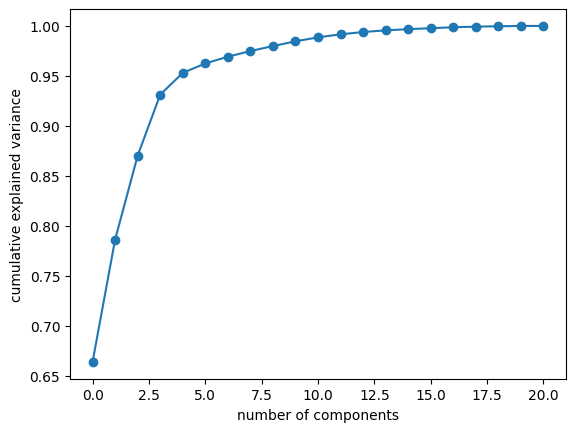

In [69]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_), "-o")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [70]:
n = 3
pca = PCA(n_components = n)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = [f"principal component {i+1}" for i in range(n)])
finalDf = pd.concat([principalDf, df[["label"]]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,label
0,7.654273,0.353518,-1.143495,1
1,2.149376,2.101458,1.664988,2
2,-2.460984,1.781568,0.257646,2
3,-4.258061,-0.259702,-0.624422,1
4,3.624591,5.240152,-1.740405,2


In [71]:
sum(pca.explained_variance_ratio_)

0.8701312127959466

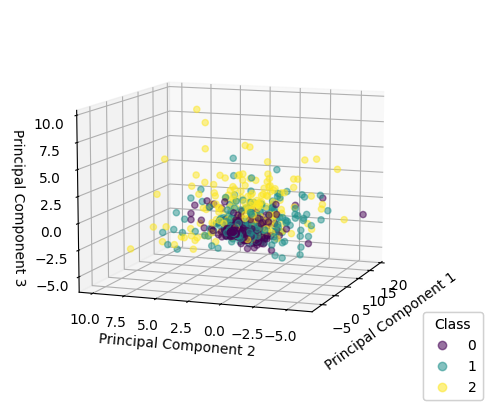

In [72]:
axs = plt.subplot(111, projection = "3d")

plot = axs.scatter(finalDf.iloc[:, 0], finalDf.iloc[:, 1], finalDf.iloc[:, 2], c = finalDf.iloc[:, 3], alpha = 0.5)
legend = axs.legend(*plot.legend_elements(), title = "Class", bbox_to_anchor = (1.2, .2))
axs.add_artist(legend)
axs.set_xlabel("Principal Component 1")
axs.set_ylabel("Principal Component 2")
axs.set_zlabel("Principal Component 3")

axs.view_init(elev = 10., azim = 200)

## Output data

In [73]:
# Save Networkx graph.
with open("./data/graph.pkl", "wb") as f:
    pickle.dump(nx.readwrite.json_graph.node_link_data(G), f)

# Save teams label.
with open("./data/teams_label.pkl", "wb") as out:
    pickle.dump(teams_label, out)
    
# Save node attributes.
with open("./data/nodes_attribute.pkl", "wb") as f:
    pickle.dump(nodes_attribute, f)
    
# Save node names.
with open("./data/nodes_name.pkl", "wb") as out:
    pickle.dump(nodes_name, out)
    
# Save node names.
with open("./data/teams_name.pkl", "wb") as out:
    pickle.dump(teams_name, out)
    
# Save teams continuous label.
with open("./data/teams_continuous_label.pkl", "wb") as out:
    pickle.dump(incomes_ranked, out)